In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from random import random
from math import floor
from math import ceil
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
warnings.filterwarnings("ignore")

In [3]:
full_description = ['MFGO, разб. 1:20',
                    'HGO, 0.0116 г в 25 мл H2O',
                    'GO, RusGraphene, 2 г в 1000 мл H2O',
                    'rGO, 2 г в 1000 мл H2O',
                    'rGO, RusGraphene, 2 г в 1000 мл H2O',
                    'GO, RusGraphene, 2 г в 1000 мл H2O',
                    'GO, RusGraphene, 1.00 г в 250 мл H2O',
                    'rGO, RusGraphene, 0.20 г в 100 мл H2O',
                    'GO, RusGraphene, 1.00 г в 250 мл H2O',
                    'GO, USA, 0.1 г в 100 мл H2O',
                    'GO, RusGraphene, 2 г в 1000 мл H2O',
                    'Образец 8 после диализа 7 дней, H2O, стакан 1 л, замена воды каждые 2 дня',
                    'Образец 8 после диализа 7 дней, H2O, стакан 1 л, замена воды каждые 2 дня',
                    'Образец 8 после диализа 3.5 кДа, конд. 7 дней в H2O',
                    'Образец 8 после диализа 3.5 кДа, конд. 7 дней в ЭДТА 0.05 М',
                    'Образец 10 после диализа 3.5 кДа, конд.',
                    'Образец 8 после диализа 3.5 кДа, конд. 7 дней в ЭДТА 0.05 М (повторное использование)',
                    'Образец 9 после диализа 14 кДа, конд. 7 дней в ЭДТА 0.05М',
                    'Образец 9 после диализа 14 кДа 75 мм, конд. 7 дней в ЭДТА 0.05М',
                    'Образец 9 после диализа 14 кДа 75 мм, конд. 7 дней в ЭДТА 0.05М (повторное использование)',
                    'Образец 11 после диализа 2 дня, H2O, 1 кДа',
                    'Образец 11 после диализа 5 дней, H2O, 14 кДа 75 мм',
                    'Образец 9 после диализа при 25°С 14 кДа, конд. 7 дней в ЭДТА 0.05М',
                    'Образец 9 после диализа при 45°С 14 кДа, конд. 7 дней в ЭДТА 0.05М',
                    'Образец 13 после диализа 0.5 кДа, конд. 7 дней в ЭДТА 0.05М',
                    'Образец 30 после диализа 12 дней, 14 кДа, конд. 7 дней в ЭДТА 0.05М']

In [59]:
data = pd.read_excel('data/size_zeta/size_zeta.xlsx')
data = data.rename(columns={'Шифр': 'id',
                            'PDI': '$PDI$',
                            'dсредний, нм': '$d_{average}$',
                            'Z, мВ': '$Z$'})
data.insert(loc=1, column='description', value=full_description)
data

id                                        description  $PDI$  \
0    1                                   MFGO, разб. 1:20  0.496   
1    2                          HGO, 0.0116 г в 25 мл H2O  0.301   
2    3                 GO, RusGraphene, 2 г в 1000 мл H2O  0.916   
3    5                             rGO, 2 г в 1000 мл H2O  0.290   
4    6                rGO, RusGraphene, 2 г в 1000 мл H2O  0.493   
5    8                 GO, RusGraphene, 2 г в 1000 мл H2O  0.681   
6    9               GO, RusGraphene, 1.00 г в 250 мл H2O  0.506   
7   10              rGO, RusGraphene, 0.20 г в 100 мл H2O  0.896   
8   11               GO, RusGraphene, 1.00 г в 250 мл H2O  0.635   
9   12                        GO, USA, 0.1 г в 100 мл H2O  0.611   
10  13                 GO, RusGraphene, 2 г в 1000 мл H2O  0.346   
11  17  Образец 8 после диализа 7 дней, H2O, стакан 1 ...  0.505   
12  18  Образец 8 после диализа 7 дней, H2O, стакан 1 ...  0.380   
13  19  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...  0.694   
14  20  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...  0.565   
15  21            Образец 10 после диализа 3.5 кДа, конд.  0.903   
16  22  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...  0.584   
17  23  Образец 9 после диализа 14 кДа, конд. 7 дней в...  0.669   
18  24  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...  0.575   
19  25  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...  0.514   
20  26         Образец 11 после диализа 2 дня, H2O, 1 кДа  0.733   
21  27  Образец 11 после диализа 5 дней, H2O, 14 кДа 7...  0.824   
22  28  Образец 9 после диализа при 25°С 14 кДа, конд....  0.717   
23  29  Образец 9 после диализа при 45°С 14 кДа, конд....  0.775   
24  30  Образец 13 после диализа 0.5 кДа, конд. 7 дней...  0.601   
25  31  Образец 30 после диализа 12 дней, 14 кДа, конд...  0.510   

    $d_{average}$   $Z$  
0          1417.0  -8.2  
1           352.9 -28.0  
2          3286.3 -33.5  
3           422.0 -26.4  
4          3792.0 -19.8  
5          1901.0 -30.5  
6          2892.0 -34.9  
7          4007.0 -23.7  
8          2111.0 -37.9  
9           280.5 -33.2  
10          832.9 -35.7  
11         1105.0 -25.1  
12         1238.0 -28.1  
13         1247.0 -29.9  
14          864.3 -30.7  
15         4189.0 -23.3  
16         1058.0 -29.0  
17         1116.0 -25.4  
18          626.3 -30.7  
19          620.7 -28.0  
20         1043.0 -28.8  
21         1619.0 -27.5  
22         1255.0 -28.3  
23         1243.0 -26.5  
24          925.5 -28.3  
25          742.9 -25.1

In [60]:
data.columns

Index(['id', 'description', '$PDI$', '$d_{average}$', '$Z$'], dtype='object')

In [61]:
data = data.rename(columns={
    '$d_{average}$': '$d_{average}, nm$',
    '$Z$': '$Z, mV$'
})

In [62]:
initial_df = data.copy()

In [63]:
scaler = MinMaxScaler()

data[['$PDI$', '$d_{average}, nm$', '$Z, mV$']] = scaler.fit_transform(data[['$PDI$', '$d_{average}, nm$', '$Z, mV$']])
data

id                                        description     $PDI$  \
0    1                                   MFGO, разб. 1:20  0.329073   
1    2                          HGO, 0.0116 г в 25 мл H2O  0.017572   
2    3                 GO, RusGraphene, 2 г в 1000 мл H2O  1.000000   
3    5                             rGO, 2 г в 1000 мл H2O  0.000000   
4    6                rGO, RusGraphene, 2 г в 1000 мл H2O  0.324281   
5    8                 GO, RusGraphene, 2 г в 1000 мл H2O  0.624601   
6    9               GO, RusGraphene, 1.00 г в 250 мл H2O  0.345048   
7   10              rGO, RusGraphene, 0.20 г в 100 мл H2O  0.968051   
8   11               GO, RusGraphene, 1.00 г в 250 мл H2O  0.551118   
9   12                        GO, USA, 0.1 г в 100 мл H2O  0.512780   
10  13                 GO, RusGraphene, 2 г в 1000 мл H2O  0.089457   
11  17  Образец 8 после диализа 7 дней, H2O, стакан 1 ...  0.343450   
12  18  Образец 8 после диализа 7 дней, H2O, стакан 1 ...  0.143770   
13  19  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...  0.645367   
14  20  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...  0.439297   
15  21            Образец 10 после диализа 3.5 кДа, конд.  0.979233   
16  22  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...  0.469649   
17  23  Образец 9 после диализа 14 кДа, конд. 7 дней в...  0.605431   
18  24  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...  0.455272   
19  25  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...  0.357827   
20  26         Образец 11 после диализа 2 дня, H2O, 1 кДа  0.707668   
21  27  Образец 11 после диализа 5 дней, H2O, 14 кДа 7...  0.853035   
22  28  Образец 9 после диализа при 25°С 14 кДа, конд....  0.682109   
23  29  Образец 9 после диализа при 45°С 14 кДа, конд....  0.774760   
24  30  Образец 13 после диализа 0.5 кДа, конд. 7 дней...  0.496805   
25  31  Образец 30 после диализа 12 дней, 14 кДа, конд...  0.351438   

    $d_{average}, nm$   $Z, mV$  
0            0.290777  1.000000  
1            0.018524  0.333333  
2            0.769042  0.148148  
3            0.036203  0.387205  
4            0.898427  0.609428  
5            0.414609  0.249158  
6            0.668159  0.101010  
7            0.953435  0.478114  
8            0.468338  0.000000  
9            0.000000  0.158249  
10           0.141333  0.074074  
11           0.210950  0.430976  
12           0.244979  0.329966  
13           0.247282  0.269360  
14           0.149367  0.242424  
15           1.000000  0.491582  
16           0.198925  0.299663  
17           0.213765  0.420875  
18           0.088474  0.242424  
19           0.087041  0.333333  
20           0.195088  0.306397  
21           0.342459  0.350168  
22           0.249328  0.323232  
23           0.246258  0.383838  
24           0.165025  0.323232  
25           0.118306  0.430976

In [9]:
path_to_save = 'results/size_zeta'

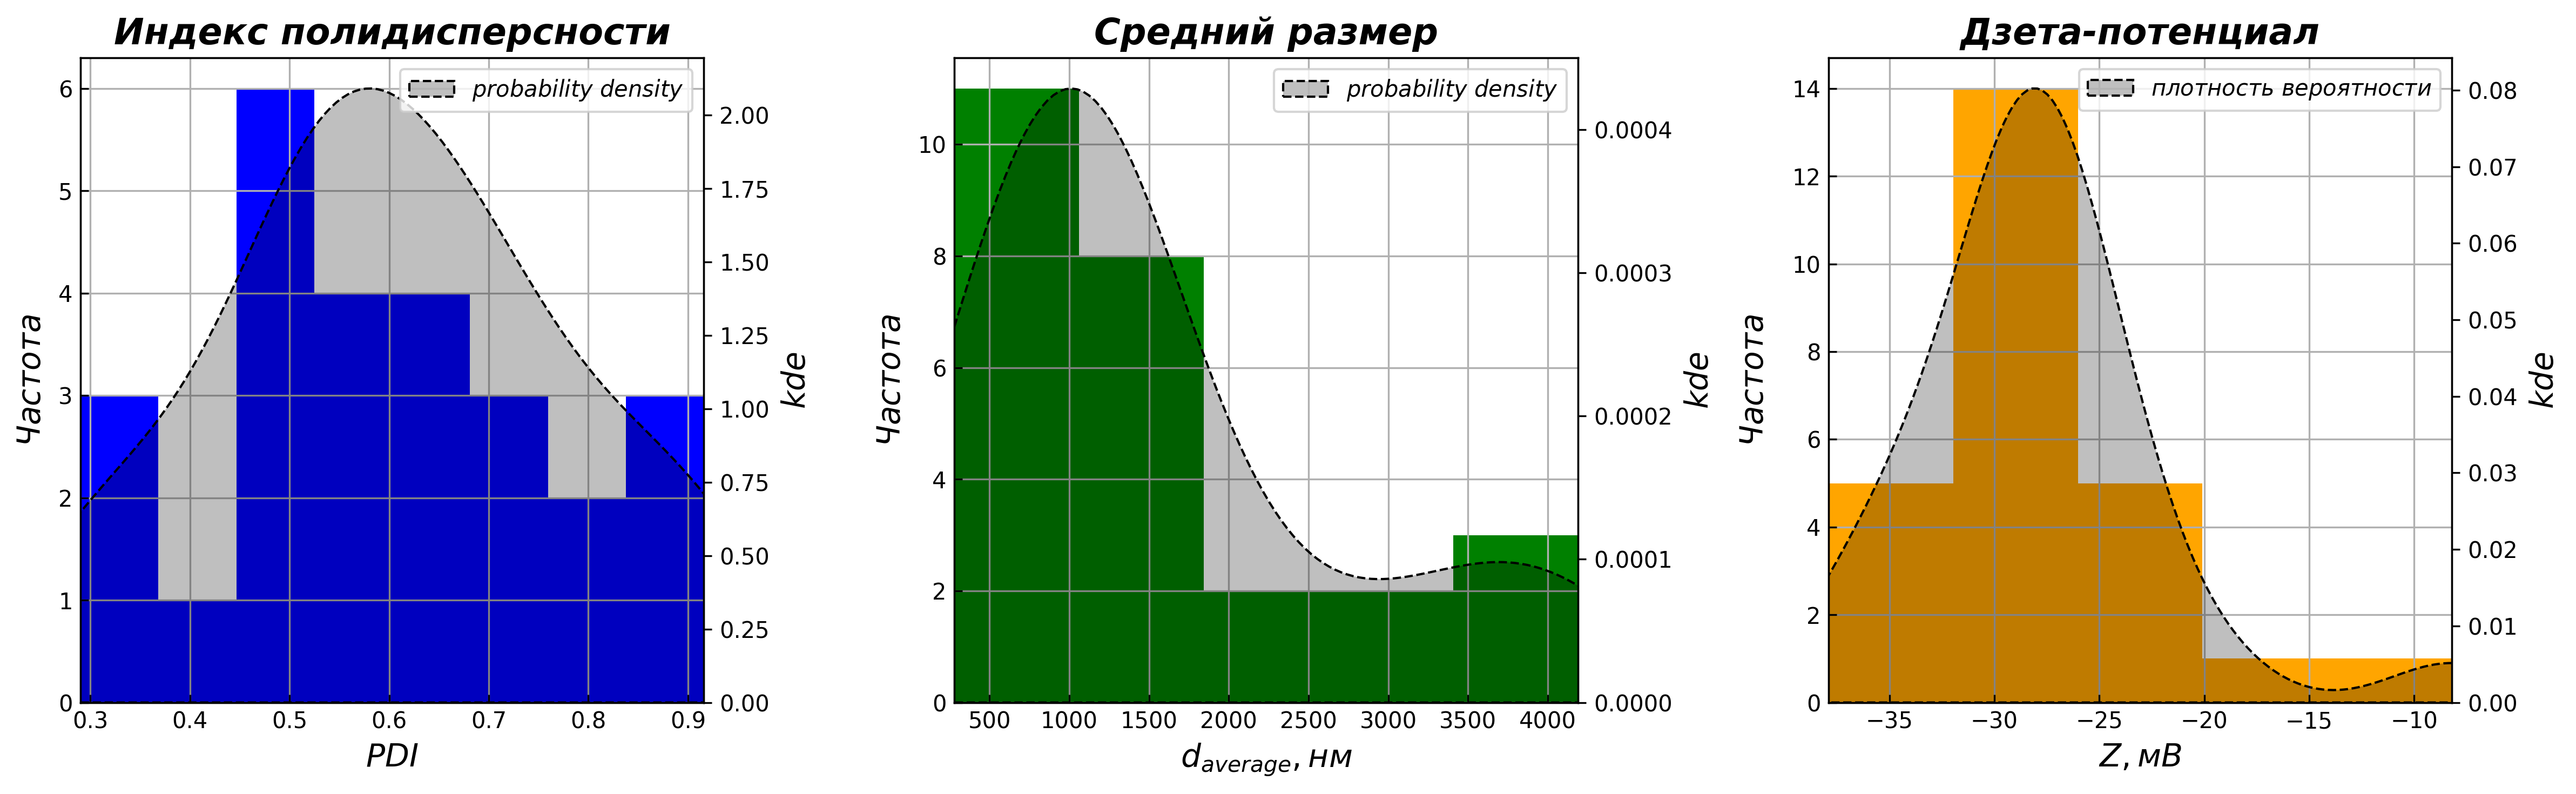

In [10]:
fig = plt.figure(figsize=(16, 5), dpi=300, linewidth=1.0)

nrows = 1
ncols = 3

# ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ПОЛИДИСПЕРСНОСТИ
plt.subplot(nrows, ncols, 1)
plt.grid(True)
plt.tick_params(direction='in')
ax = fig.gca()
ax_twinx = ax.twinx()  
ax.set_title('Индекс полидисперсности',
             fontname='DejaVu Sans',
             fontsize=16,
             fontstyle='italic',
             fontweight='bold')
ax.hist(x=initial_df['$PDI$'].to_numpy(),
        bins=8,
        color='blue')
sns.kdeplot(data=initial_df['$PDI$'].to_numpy(),
            ax=ax_twinx,
            color='black',
            linestyle='--',
            fill=True,
            label='$probability$ $density$')
ax.set_xlabel('$PDI$',
              fontname='DejaVu Sans',
              fontsize=14)
ax.set_ylabel('$Частота$',
              fontname='DejaVu Sans',
              fontsize=14,
              rotation=90,
              labelpad=5)
ax_twinx.set_ylabel('$kde$',
                    fontname='DejaVu Sans',
                    fontsize=14,
                    rotation=90,
                    labelpad=5)
ax.set_xlim(initial_df['$PDI$'].min(), initial_df['$PDI$'].max())
plt.legend()

# ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ (РАЗМЕР)
plt.subplot(nrows, ncols, 2)
plt.grid(True)
plt.tick_params(direction='in')
ax = fig.gca()
ax_twinx = ax.twinx()  
ax.set_title('Средний размер',
             fontname='DejaVu Sans',
             fontsize=16,
             fontstyle='italic',
             fontweight='bold')
ax.hist(x=initial_df['$d_{average}, nm$'].to_numpy(),
        bins=5,
        color='green')
sns.kdeplot(data=initial_df['$d_{average}, nm$'].to_numpy(),
            ax=ax_twinx,
            color='black',
            linestyle='--',
            fill=True,
            label='$probability$ $density$')
ax.set_xlabel('$d_{average}, нм$',
              fontname='DejaVu Sans',
              fontsize=14)
ax.set_ylabel('$Частота$',
              fontname='DejaVu Sans',
              fontsize=14,
              rotation=90,
              labelpad=5)
ax_twinx.set_ylabel('$kde$',
                    fontname='DejaVu Sans',
                    fontsize=14,
                    rotation=90,
                    labelpad=5)
ax.set_xlim(initial_df['$d_{average}, nm$'].min(), initial_df['$d_{average}, nm$'].max())
plt.legend()

# ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ (ЗЕТА-ПОТЕНЦИАЛ)
plt.subplot(nrows, ncols, 3)
plt.grid(True)
plt.tick_params(direction='in')
ax = fig.gca()
ax_twinx = ax.twinx()  
ax.set_title('Дзета-потенциал',
             fontname='DejaVu Sans',
             fontsize=16,
             fontstyle='italic',
             fontweight='bold')
ax.hist(x=initial_df['$Z, mV$'].to_numpy(),
        bins=5,
        color='orange')
sns.kdeplot(data=initial_df['$Z, mV$'].to_numpy(),
            ax=ax_twinx,
            color='black',
            linestyle='--',
            fill=True,
            label='$плотность$ $вероятности$')
ax.set_xlabel('$Z, мВ$',
              fontname='DejaVu Sans',
              fontsize=14)
ax.set_ylabel('$Частота$',
              fontname='DejaVu Sans',
              fontsize=14,
              rotation=90,
              labelpad=10)
ax_twinx.set_ylabel('$kde$',
                    fontname='DejaVu Sans',
                    fontsize=14,
                    rotation=90,
                    labelpad=5)
ax.set_yticks(np.arange(0, 15, 2))
ax.set_xlim(initial_df['$Z, mV$'].min(), initial_df['$Z, mV$'].max())

plt.legend()
plt.tight_layout()
plt.savefig(path_to_save + '/pdi_size_zeta_distribution.png', dpi=600)
plt.show()

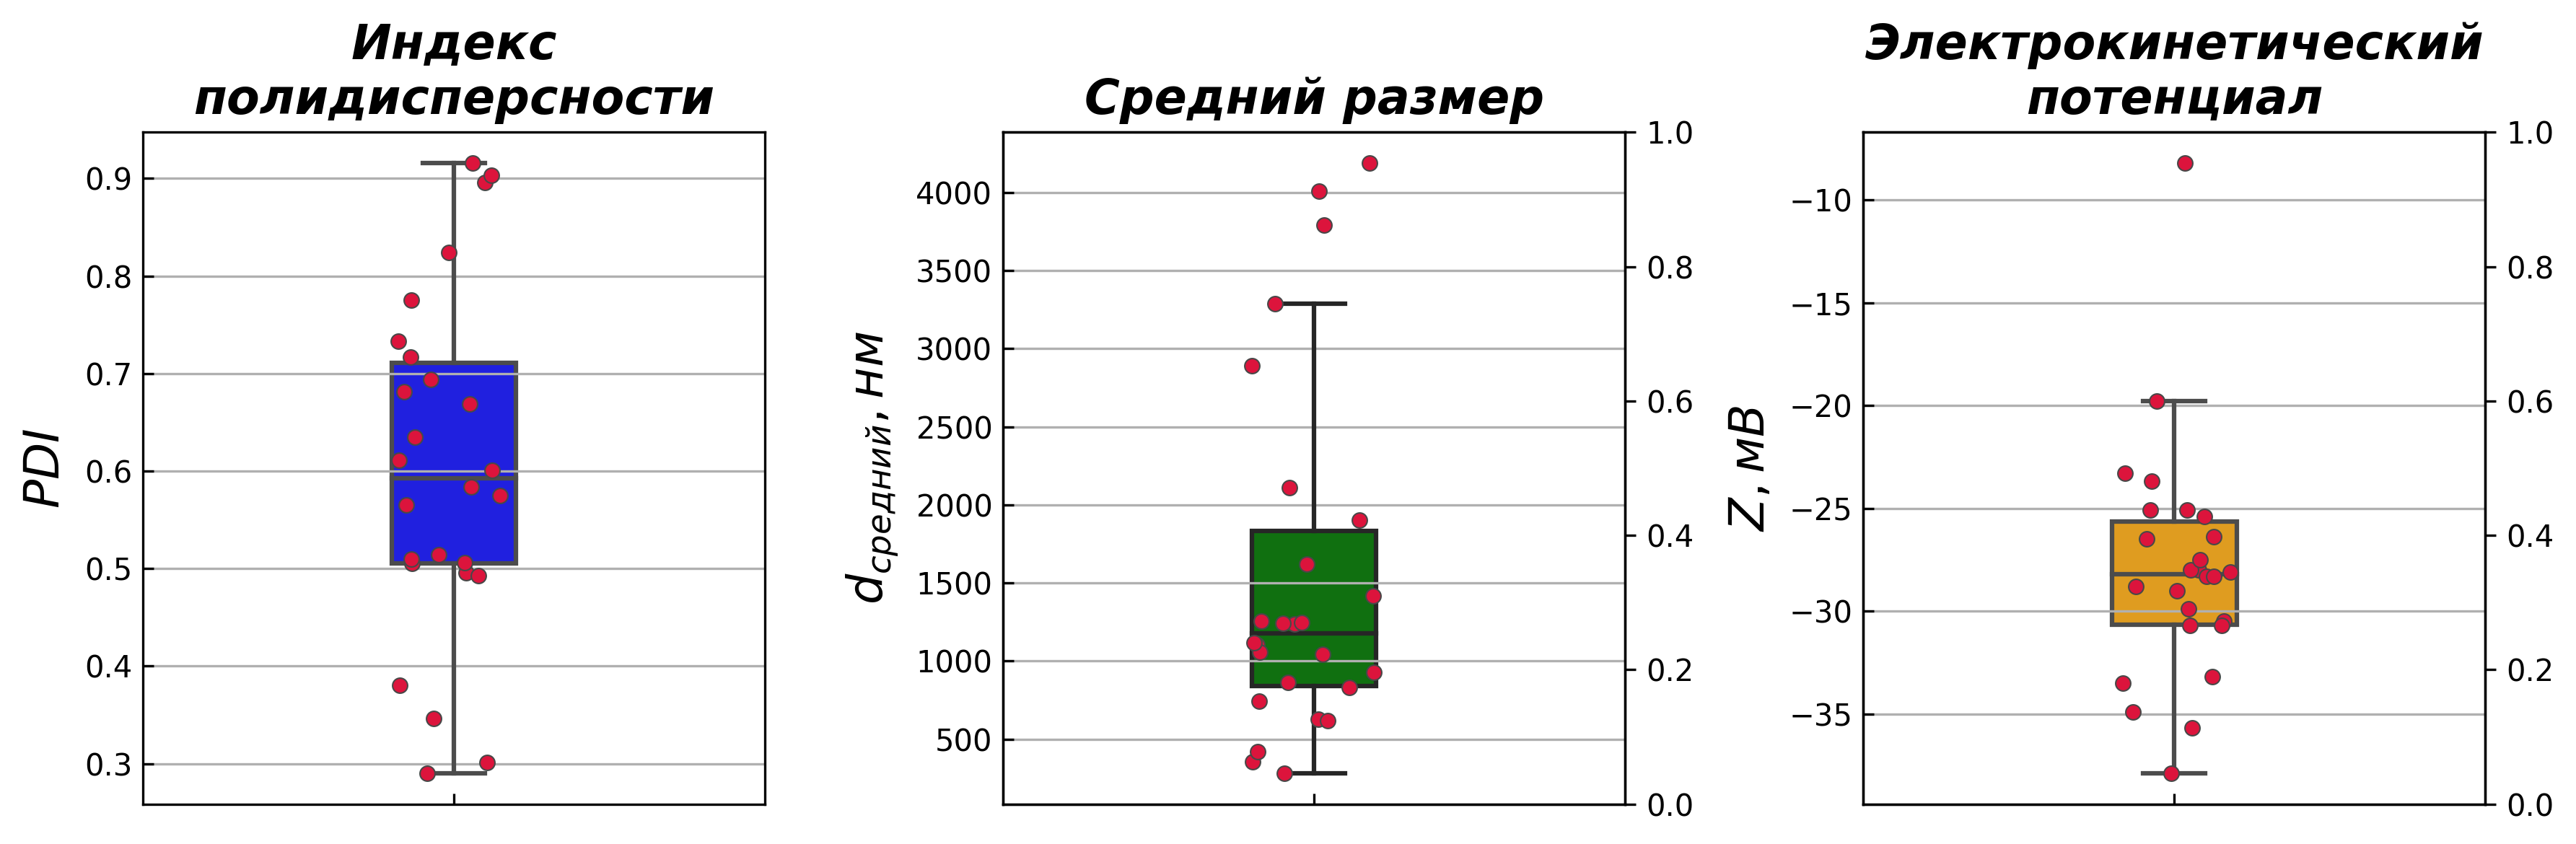

In [13]:
fig = plt.figure(figsize=(12, 4), dpi=300, linewidth=1.0)

nrows = 1
ncols = 3

plt.style.use('default')
# BOX-PLOT (ПОЛИДИСПЕРСНОСТЬ)
plt.subplot(nrows, ncols, 1)
plt.grid(True)
plt.tick_params(direction='in')
ax = fig.gca()
ax.set_title('Индекс\nполидисперсности',
             fontname='DejaVu Sans',
             fontsize=16,
             fontstyle='italic',
             fontweight='bold')
sns.boxplot(data=initial_df,
            y=initial_df['$PDI$'],
            width=0.2,
            color='blue',
            showfliers=False,
            ax=ax)
sns.stripplot(data=initial_df,
              y=initial_df['$PDI$'],
              color='crimson',
              alpha=1,
              linewidth=0.5,
              ax=ax)
ax.set_ylabel('$PDI$',
              fontname='DejaVu Sans',
              fontsize=16,
              rotation=90,
              labelpad=5)

# BOX-PLOT (РАЗМЕР)
plt.subplot(nrows, ncols, 2)
plt.grid(True)
plt.tick_params(direction='in')
ax = fig.gca()
ax_twinx = ax.twinx()  
ax.set_title('Средний размер',
             fontname='DejaVu Sans',
             fontsize=16,
             fontstyle='italic',
             fontweight='bold')
sns.boxplot(data=initial_df,
            y=initial_df['$d_{average}, nm$'],
            width=0.2,
            color='green',
            showfliers=False,
            ax=ax)
sns.stripplot(data=initial_df,
              y=initial_df['$d_{average}, nm$'],
              color='crimson',
              alpha=1,
              linewidth=0.5,
              ax=ax)
ax.set_ylabel('$d_{средний}, нм$',
              fontname='DejaVu Sans',
              fontsize=16,
              rotation=90,
              labelpad=5)


# BOX-PLOT (ЗЕТА)
plt.subplot(nrows, ncols, 3)
plt.grid(True)
plt.tick_params(direction='in')
ax = fig.gca()
ax_twinx = ax.twinx()  
ax.set_title('Электрокинетический\nпотенциал',
             fontname='DejaVu Sans',
             fontsize=16,
             fontstyle='italic',
             fontweight='bold')
sns.boxplot(data=initial_df,
            y=initial_df['$Z, mV$'],
            width=0.2,
            color='orange',
            showfliers=False,
            ax=ax)
sns.stripplot(data=initial_df,
              y=initial_df['$Z, mV$'],
              color='crimson',
              alpha=1,
              linewidth=0.5,
              ax=ax)
ax.set_ylabel('$Z, мВ$',
              fontname='DejaVu Sans',
              fontsize=16,
              rotation=90,
              labelpad=5)

plt.tight_layout()
plt.savefig(path_to_save + '/pdi_size_zeta_one_row.png', dpi=600)
plt.show()

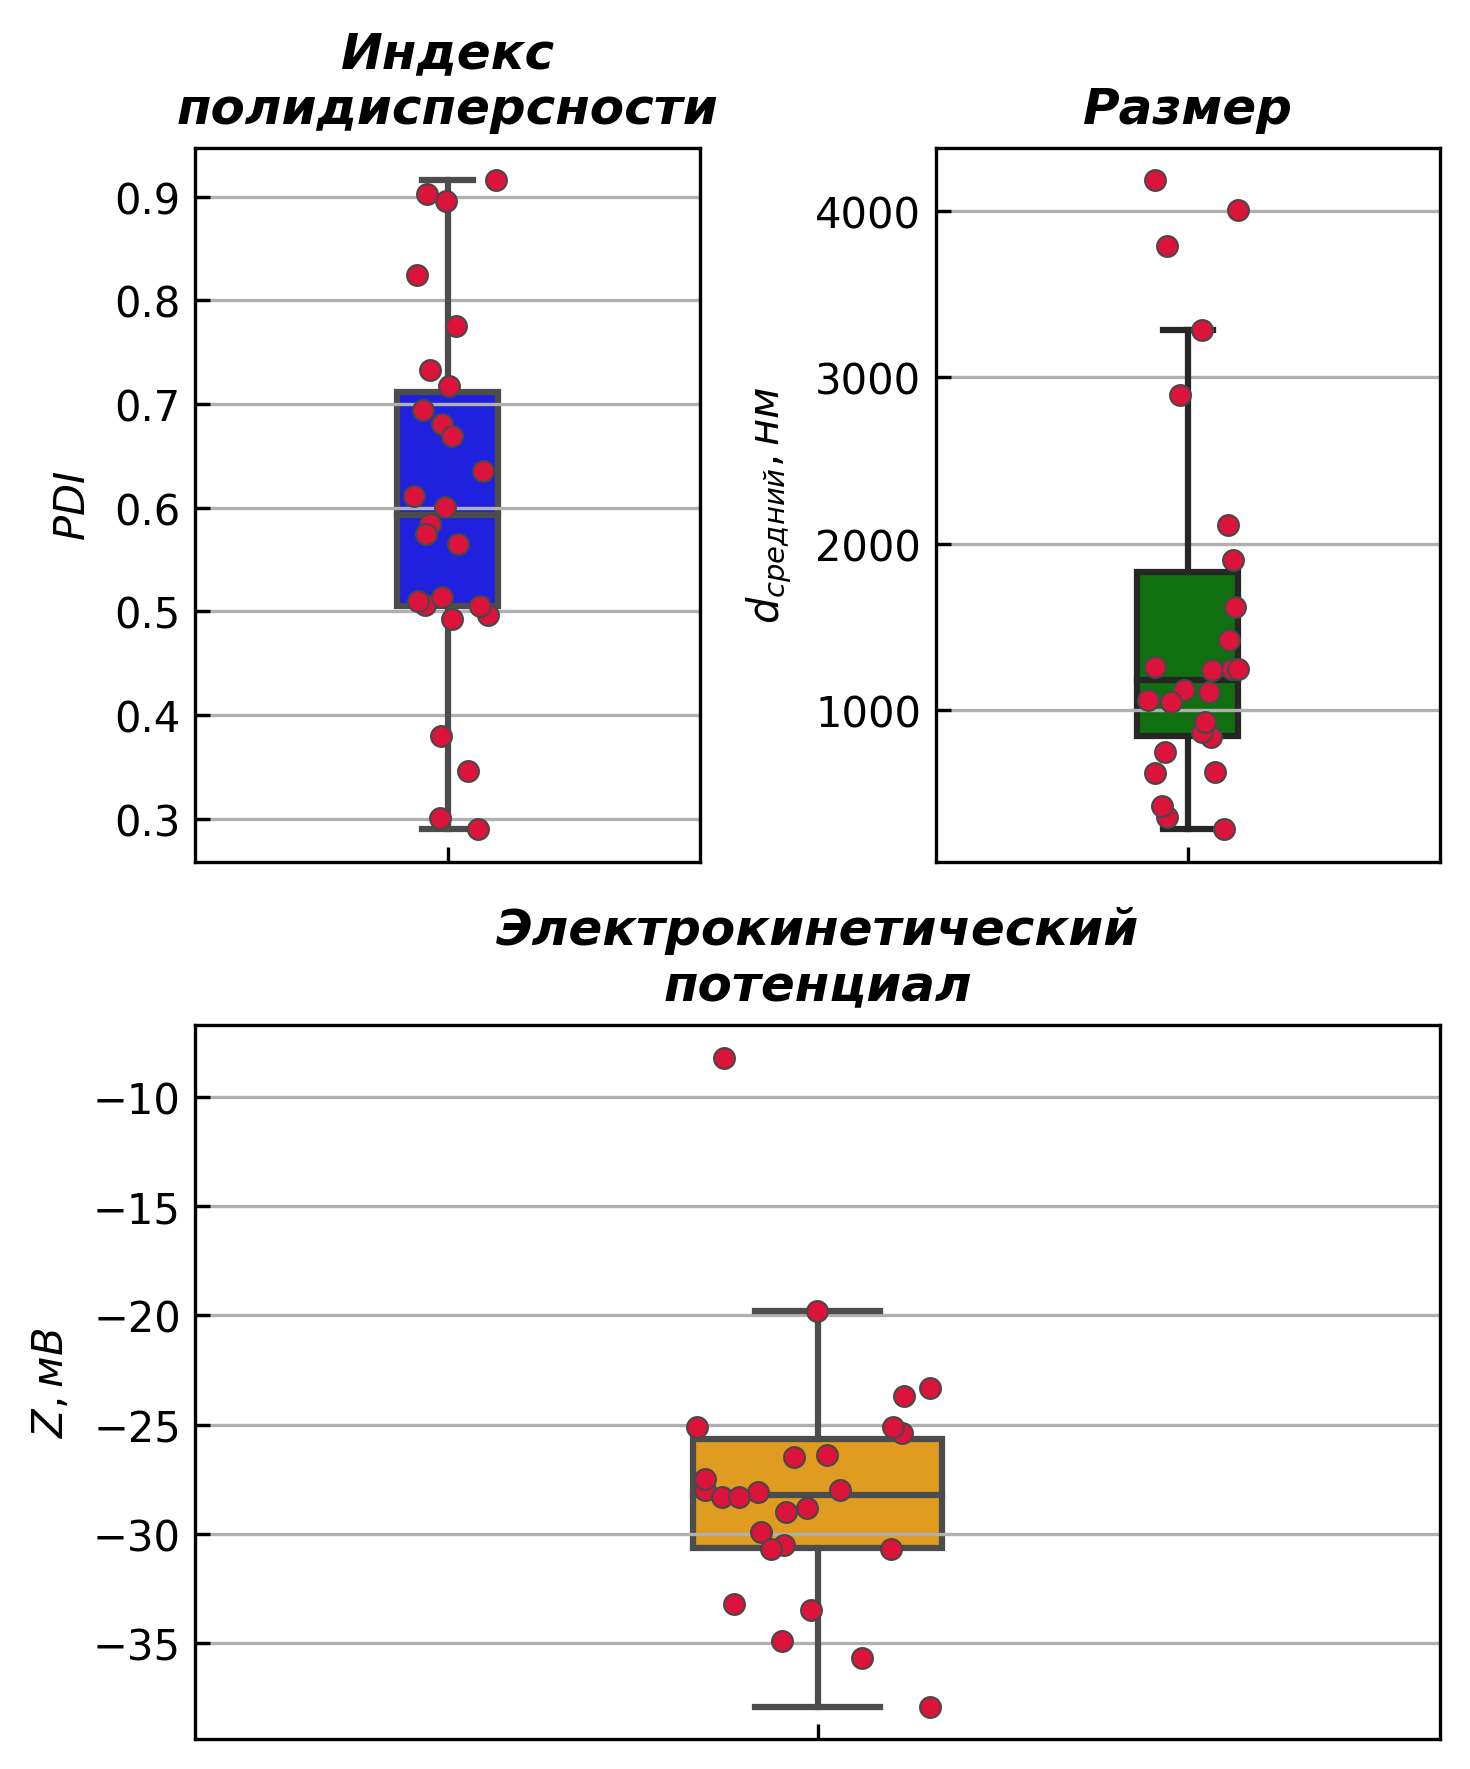

In [14]:
fig, ax = plt.subplot_mosaic([['left_up', 'right_up'],
                              ['left_down', 'left_down']],
                             gridspec_kw={'width_ratios': [1, 1]},
                             figsize=(5, 6),
                             linewidth=1.0,
                             dpi=300,
                             layout='constrained')

nrows = 1
ncols = 3

plt.title('BoxPlot')

# BOX-PLOT (ПОЛИДИСПЕРСНОСТЬ)
ax['left_up'].grid(True)
ax['left_up'].tick_params(direction='in')
ax['left_up'].set_title('Индекс\nполидисперсности',
             fontname='DejaVu Sans',
             fontsize=12,
             fontstyle='italic',
             fontweight='bold')
sns.boxplot(data=initial_df,
            y=initial_df['$PDI$'],
            width=0.2,
            color='blue',
            showfliers=False,
            ax=ax['left_up'])
sns.stripplot(data=initial_df,
              y=initial_df['$PDI$'],
              color='crimson',
              alpha=1,
              linewidth=0.5,
              ax=ax['left_up'])
ax['left_up'].set_ylabel('$PDI$',
                         fontname='DejaVu Sans',
                         fontsize=10,
                         rotation=90,
                         labelpad=5)

# BOX-PLOT (РАЗМЕРЫ)
ax['right_up'].grid(True)
ax['right_up'].tick_params(direction='in')
ax['right_up'].set_title('Размер',
             fontname='DejaVu Sans',
             fontsize=12,
             fontstyle='italic',
             fontweight='bold')
sns.boxplot(data=initial_df,
            y=initial_df['$d_{average}, nm$'],
            width=0.2,
            color='green',
            showfliers=False,
            ax=ax['right_up'])
sns.stripplot(data=initial_df,
              y=initial_df['$d_{average}, nm$'],
              color='crimson',
              alpha=1,
              linewidth=0.5,
              ax=ax['right_up'])
ax['right_up'].set_ylabel('$d_{средний}, нм$',
                          fontname='DejaVu Sans',
                          fontsize=10,
                          rotation=90,
                          labelpad=5)

# BOX-PLOT (ЗЕТА)
ax['left_down'].grid(True)
ax['left_down'].tick_params(direction='in')
ax['left_down'].set_title('Электрокинетический\nпотенциал',
             fontname='DejaVu Sans',
             fontsize=12,
             fontstyle='italic',
             fontweight='bold')
sns.boxplot(data=initial_df,
            y=initial_df['$Z, mV$'],
            width=0.2,
            color='orange',
            showfliers=False,
            ax=ax['left_down'])
sns.stripplot(data=initial_df,
              y=initial_df['$Z, mV$'],
              color='crimson',
              alpha=1,
              linewidth=0.5,
              ax=ax['left_down'])
ax['left_down'].set_ylabel('$Z, мВ$',
                           fontname='DejaVu Sans',
                           fontsize=10,
                           rotation=90,
                           labelpad=5)
plt.tight_layout()
plt.savefig(path_to_save + '/pdi_size_zeta_boxplot.png', dpi=600)
plt.show()

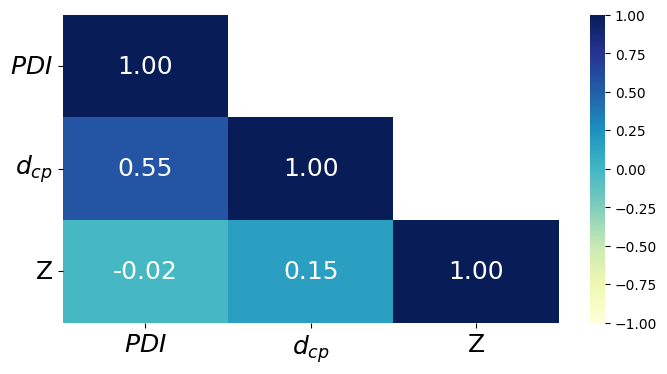

In [42]:
corr_labels = {'$PDI$': '$PDI$',
               '$d_{average}, nm$': '$d_{ср}$',
               '$Z, mV$': 'Z'}

df_corr = data.iloc[:, 2:].copy().rename(columns=corr_labels)

corr = df_corr.corr()
corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
plt.figure(figsize=(8, 4), dpi=100)
#  cmap = [YlGnBu, PiYG, Reds, BuPu]
corr_plot = sns.heatmap(corr,
                        cmap="YlGnBu",
                        annot=True,
                        vmax=1.0,
                        vmin=-1.0,
                        center=0.0,
                        fmt='.2f',
                        annot_kws={'size': 18})
corr_plot.set_yticklabels(corr_plot.get_yticklabels(), rotation=0, fontsize=18)
corr_plot.set_xticklabels(corr_plot.get_xticklabels(), rotation=0, fontsize=18)
plt.savefig(path_to_save + '/size_zeta_corr.png', dpi=600)

In [98]:
def cluster_analysis(data, n_clusters, figsize=(16, 9), save='n', name_of_file='curve', dpi=300, labels=[]):
    fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                                  ['lower left', 'right']],
                                 gridspec_kw={'width_ratios': [2, 7], 'height_ratios': [1, 1]},
                                 figsize=figsize,
                                 dpi=dpi,
                                 layout='constrained')
    
    info = data.iloc[:, :2]
    clust_data = data.iloc[:, 2:]
    kmeans = KMeans(n_clusters=n_clusters,
                    init='k-means++',
                    random_state=42)
    groups = kmeans.fit_predict(clust_data)
    info.insert(loc=0, column='cluster_label', value=groups)
    info['cluster_label'] += 1
    info = info.sort_values(by='cluster_label')

    x_range = list(range(1, 9))
    inertia = []
    silhouette = []
    for n_clusts in x_range:
        kmeans = KMeans(n_clusters=n_clusts, init='k-means++', random_state=42)
        kmeans.fit(clust_data)
        inertia.append(kmeans.inertia_)
        if n_clusts >= 2:
            silhouette.append(silhouette_score(clust_data, kmeans.labels_))

    ax['upper left'].grid(False)
    ax['upper left'].tick_params(direction='in')
    ax['upper left'].set_title(f'Elbow method',
                               fontname='DejaVu Sans',
                               fontsize=20,
                               fontstyle='italic',
                               fontweight='heavy')
    ax['upper left'].plot(x_range,
                          inertia,
                          '-o',
                          color='orange')
    ax['upper left'].set_xlabel('$Число$ $кластеров$',
                                fontname='DejaVu Sans',
                                fontsize=16)
    ax['upper left'].set_ylabel('$WCSS$',
                                fontname='DejaVu Sans',
                                fontsize=16)
    
    ax['lower left'].grid(False)
    ax['lower left'].tick_params(direction='in')
    ax['lower left'].set_title(f'Silhouette-score',
                               fontname='DejaVu Sans',
                               fontsize=20,
                               fontstyle='italic',
                               fontweight='heavy')
    ax['lower left'].plot(x_range[1:],
                          silhouette,
                          '-o',
                          color='orange')
    ax['lower left'].set_xlabel('$Число$ $кластеров$',
                                fontname='DejaVu Sans',
                                fontsize=16)
    ax['lower left'].set_ylabel('$SS$',
                                fontname='DejaVu Sans',
                                fontsize=16)

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    groups = kmeans.fit_predict(clust_data)
    ax['right'].grid(True)
    ax['right'].tick_params(direction='in')
    ax_labels = list(clust_data.columns)
    ax['right'].set_title('Диаграмма рассеяния',
                          fontname='DejaVu Sans',
                          fontsize=20,
                          fontstyle='italic',
                          fontweight='heavy')
    
    def generate_color():
        r, g, b = random(), random(), random()
        return (r, g, b)
    
    for i in range(n_clusters):
        color = generate_color()
        x_f = clust_data[groups == i].iloc[:, 0]
        y_f = clust_data[groups == i].iloc[:, 1]
        x_cl = kmeans.cluster_centers_[:, 0][i]
        y_cl = kmeans.cluster_centers_[:, 1][i]
        ax['right'].scatter(x=x_f,
                            y=y_f,
                            marker='o',
                            color=color,
                            s=300,
                            edgecolors='black',
                            alpha=0.6,
                            label=f'объекты кластера №{i+1}')
        ax['right'].scatter(x=x_cl,
                            y=y_cl,
                            marker='s',
                            edgecolors='black',
                            color=color,
                            s=300,
                            label=f'$центроида$ $№{i+1}$')
        x_point_cluster = [[x, x_cl] for x in x_f]
        y_point_cluster = [[y, y_cl] for y in y_f]
        for pair_x, pair_y in zip(x_point_cluster, y_point_cluster):
            ax['right'].plot(pair_x,
                       pair_y,
                       linewidth=0.7,
                       color=color)
    if len(labels) > 0:
        for label, x, y, i in zip(labels, clust_data.iloc[:, 0], clust_data.iloc[:, 1], range(len(labels))):
            ax['right'].annotate(f'$\\bf{label}$',
                         xy=(x, y),
                         fontsize=10,
                         ha='center',
                         va='center')
    else:
        pass
    ax['right'].set_xlabel(ax_labels[0], fontname='DejaVu Sans', fontsize=24, style='italic')
    ax['right'].set_ylabel(ax_labels[1], fontname='DejaVu Sans', fontsize=24, style='italic')
    ax['right'].legend(fancybox=True,
                       shadow=True,
                       prop={'size': 14})
    
    if save in ['y', 'Y', 'yes']:
        plt.savefig(name_of_file + '.png', dpi=dpi)
        info.to_excel(name_of_file + '.xlsx',
                      index=False,
                      encoding='utf-8-sig')
    return info

In [92]:
'''КЛАСТЕРНЫЙ АНАЛИЗ'''

'КЛАСТЕРНЫЙ АНАЛИЗ'

In [93]:
path_to_save = 'results/size_zeta'

In [94]:
corr_labels = {'id': 'id',
               'description': 'description',
               '$PDI$': '$PDI$',
               '$d_{average}, nm$': '$d_{средний}, нм$',
               '$Z, mV$': 'Z, мВ'}

data = data.rename(columns=corr_labels)

In [100]:
# Пара признаков (PDI, d)

features1 = data.iloc[:, [0, 1] + [2, 3]]

cluster_analysis(data=features1,
                 n_clusters=5,
                 save='y',
                 name_of_file=path_to_save + '/clan_pdi_d',
                 labels=data['id'],
                 dpi=600)

cluster_label  id                                        description
4               1   6                rGO, RusGraphene, 2 г в 1000 мл H2O
6               1   9               GO, RusGraphene, 1.00 г в 250 мл H2O
8               2  11               GO, RusGraphene, 1.00 г в 250 мл H2O
20              2  26         Образец 11 после диализа 2 дня, H2O, 1 кДа
13              2  19  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
21              2  27  Образец 11 после диализа 5 дней, H2O, 14 кДа 7...
22              2  28  Образец 9 после диализа при 25°С 14 кДа, конд....
23              2  29  Образец 9 после диализа при 45°С 14 кДа, конд....
17              2  23  Образец 9 после диализа 14 кДа, конд. 7 дней в...
5               2   8                 GO, RusGraphene, 2 г в 1000 мл H2O
10              3  13                 GO, RusGraphene, 2 г в 1000 мл H2O
3               3   5                             rGO, 2 г в 1000 мл H2O
1               3   2                          HGO, 0.0116 г в 25 мл H2O
12              3  18  Образец 8 после диализа 7 дней, H2O, стакан 1 ...
7               4  10              rGO, RusGraphene, 0.20 г в 100 мл H2O
2               4   3                 GO, RusGraphene, 2 г в 1000 мл H2O
15              4  21            Образец 10 после диализа 3.5 кДа, конд.
19              5  25  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...
0               5   1                                   MFGO, разб. 1:20
16              5  22  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
14              5  20  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
24              5  30  Образец 13 после диализа 0.5 кДа, конд. 7 дней...
11              5  17  Образец 8 после диализа 7 дней, H2O, стакан 1 ...
9               5  12                        GO, USA, 0.1 г в 100 мл H2O
18              5  24  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...
25              5  31  Образец 30 после диализа 12 дней, 14 кДа, конд...

In [102]:
# Пара признаков (PDI, Z)

features2 = data.iloc[:, [0, 1] + [2, 4]]

cluster_analysis(data=features2,
                 n_clusters=6,
                 save='y',
                 name_of_file=path_to_save + '/clan_pdi_z',
                 labels=data['id'],
                 dpi=600)

cluster_label  id                                        description
23              1  29  Образец 9 после диализа при 45°С 14 кДа, конд....
22              1  28  Образец 9 после диализа при 25°С 14 кДа, конд....
5               1   8                 GO, RusGraphene, 2 г в 1000 мл H2O
20              1  26         Образец 11 после диализа 2 дня, H2O, 1 кДа
17              1  23  Образец 9 после диализа 14 кДа, конд. 7 дней в...
13              1  19  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
12              2  18  Образец 8 после диализа 7 дней, H2O, стакан 1 ...
1               2   2                          HGO, 0.0116 г в 25 мл H2O
3               2   5                             rGO, 2 г в 1000 мл H2O
10              2  13                 GO, RusGraphene, 2 г в 1000 мл H2O
0               3   1                                   MFGO, разб. 1:20
24              4  30  Образец 13 после диализа 0.5 кДа, конд. 7 дней...
8               4  11               GO, RusGraphene, 1.00 г в 250 мл H2O
14              4  20  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
16              4  22  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
18              4  24  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...
6               4   9               GO, RusGraphene, 1.00 г в 250 мл H2O
9               4  12                        GO, USA, 0.1 г в 100 мл H2O
15              5  21            Образец 10 после диализа 3.5 кДа, конд.
7               5  10              rGO, RusGraphene, 0.20 г в 100 мл H2O
21              5  27  Образец 11 после диализа 5 дней, H2O, 14 кДа 7...
2               5   3                 GO, RusGraphene, 2 г в 1000 мл H2O
11              6  17  Образец 8 после диализа 7 дней, H2O, стакан 1 ...
19              6  25  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...
4               6   6                rGO, RusGraphene, 2 г в 1000 мл H2O
25              6  31  Образец 30 после диализа 12 дней, 14 кДа, конд...

In [86]:
# Пара признаков (d, Z)

features3 = data.iloc[:, [0, 1] + [3, 4]]

cluster_analysis(data=features3,
                 n_clusters=6,
                 save='y',
                 name_of_file=path_to_save + '/clan_d_z',
                 labels=data['id'],
                 dpi=600)

cluster_label  id                                        description
12              1  18  Образец 8 после диализа 7 дней, H2O, стакан 1 ...
23              1  29  Образец 9 после диализа при 45°С 14 кДа, конд....
22              1  28  Образец 9 после диализа при 25°С 14 кДа, конд....
21              1  27  Образец 11 после диализа 5 дней, H2O, 14 кДа 7...
5               1   8                 GO, RusGraphene, 2 г в 1000 мл H2O
20              1  26         Образец 11 после диализа 2 дня, H2O, 1 кДа
17              1  23  Образец 9 после диализа 14 кДа, конд. 7 дней в...
16              1  22  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
11              1  17  Образец 8 после диализа 7 дней, H2O, стакан 1 ...
24              1  30  Образец 13 после диализа 0.5 кДа, конд. 7 дней...
13              1  19  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
4               2   6                rGO, RusGraphene, 2 г в 1000 мл H2O
7               2  10              rGO, RusGraphene, 0.20 г в 100 мл H2O
15              2  21            Образец 10 после диализа 3.5 кДа, конд.
0               3   1                                   MFGO, разб. 1:20
8               4  11               GO, RusGraphene, 1.00 г в 250 мл H2O
6               4   9               GO, RusGraphene, 1.00 г в 250 мл H2O
2               4   3                 GO, RusGraphene, 2 г в 1000 мл H2O
10              5  13                 GO, RusGraphene, 2 г в 1000 мл H2O
9               5  12                        GO, USA, 0.1 г в 100 мл H2O
18              5  24  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...
14              5  20  Образец 8 после диализа 3.5 кДа, конд. 7 дней ...
19              6  25  Образец 9 после диализа 14 кДа 75 мм, конд. 7 ...
3               6   5                             rGO, 2 г в 1000 мл H2O
1               6   2                          HGO, 0.0116 г в 25 мл H2O
25              6  31  Образец 30 после диализа 12 дней, 14 кДа, конд...